In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Figure 2 ft_acc under centralized training for different mask ratios

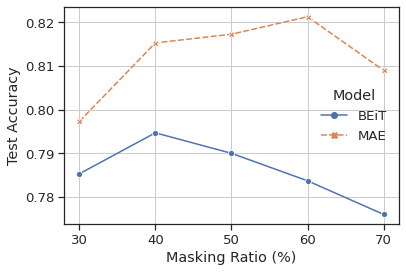

In [51]:
# fig2 ft_acc under centralized training for different mask ratios
mask_ratio  = [30,  40,   50,    60,    70]
# beit_ft_acc = [76.3, 78.63, 79.20, 80.0, 80.0]
# mae_ft_acc  = [80.0, 80.0,  80.0,  80.0, 80.0]
beit_ft_acc = [0.7853, 0.7947, 0.7900, 0.7837, 0.7760]
mae_ft_acc  = [0.7973, 0.8153,  0.8173,  0.8213, 0.8090]

data_plot = pd.DataFrame({"Masking Ratio (%)": mask_ratio, "BEiT": beit_ft_acc, 'MAE': mae_ft_acc})
data_plot = pd.melt(data_plot, ['Masking Ratio (%)'], var_name='Model', value_name='Test Accuracy')

# palette = sns.color_palette("mako_r", 2)
# 'flare'
sns.set(font_scale = 1.2)
with sns.axes_style("ticks"):
    sns.lineplot(x='Masking Ratio (%)', y='Test Accuracy', hue='Model', style="Model",
                 data=data_plot, markers=True)
    # sns.despine()
    plt.xticks(np.arange(30, 80, step=10));
    plt.grid()
    
plt.savefig(f"/home/yan/SSL-FL/plots/Fig2.png")

#### Figure 3 data heterogeneity

In [4]:
#https://seaborn.pydata.org/examples/part_whole_bars.html
from data_split import view_split

# data_path='/data/yan/SSL-FL/COVIDx'
data_path='/data/yan/SSL-FL/Retina'
out = view_split(data_path, 5, save_plot=False)

df = pd.DataFrame(out)

In [25]:
# sns.set_theme(style="whitegrid")
# # sns.set(font_scale = 1.5)
# f, axes = plt.subplots(1,3, figsize=(25, 5))

# for split_id in range(3): 
    
#     df_split = df.iloc[:,split_id].apply(pd.Series)
#     df_split = df_split.reindex(sorted(df_split.columns), axis=1)
#     df_split['Client ID'] = sorted(df_split.index)
#     df_split = df_split.reindex()
#     df_split = pd.melt(df_split, ['Client ID'], var_name='Class', value_name='Number of Images')
    
#     sns.barplot(x='Number of Images', y='Client ID', hue='Class', data=df_split, ax=axes[split_id])
#     axes[split_id].legend(ncol=2, loc="lower right", frameon=True)
    
#     if split_id in [1,2]:
#         axes[split_id].set(ylabel=None)
#     # sns.despine()
    
# plt.show()

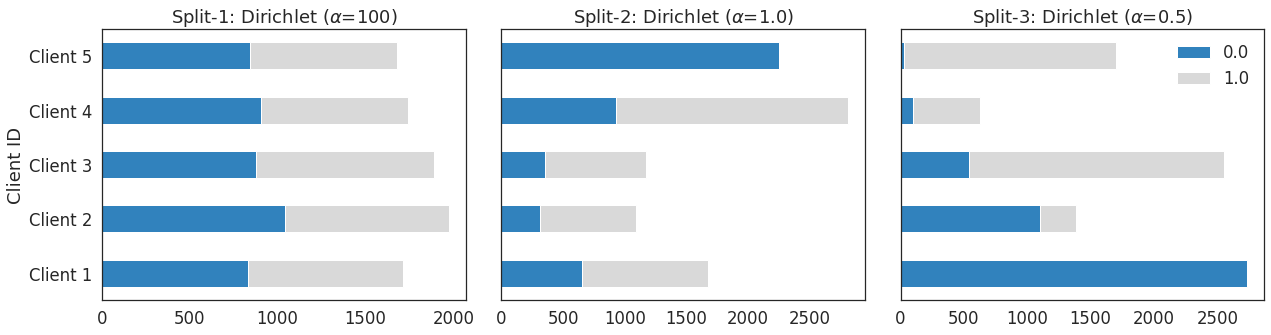

In [50]:
sns.set(font_scale = 1.5, style="white")
f, axes = plt.subplots(1, 3, figsize=(18, 5))
alpha_list = [100, 1.0, 0.5]

for split_id in range(3):
    df_split = df.iloc[:,split_id].apply(pd.Series)
    df_split = df_split.reindex(sorted(df_split.columns), axis=1)
    df_split['Client ID'] = sorted(df_split.index)
    df_split.plot(x='Client ID', kind='barh', rot=0, stacked=True, colormap='tab20c', 
                  title=f'split{split_id+1}', ax=axes[split_id], legend=False)
    # sns.despine()
    # axes[split_id].set_xlabel('Count')
    
    if split_id in [1,2]:
        axes[split_id].set_yticks([])
        axes[split_id].set(ylabel=None)
    
    axes[split_id].set_title(f'Split-{split_id+1}: '+r'Dirichlet ($\alpha$='+str(alpha_list[split_id])+')')

axes[2].legend()
f.tight_layout()

plt.savefig(f"/home/yan/SSL-FL/plots/Fig3.png")

plt.show()

#### Figure 4